In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from hnc.hnc.hnc import Integral_Equation_Solver as IET
from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n

from pandas import read_csv
from scipy.fft import fft, ifft, fftshift, ifftshift, dct, dst

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")

# import 

In [2]:
Γ, κ = 100, 3
N_bits = 10
iet = IET(1, [[Γ]], [[3/(4*π)]], [[1]], [1], kappa = κ, dst_type=2, N_bins = 2**N_bits, R_max = 100)
iet.HNC_solve(tol=1e-6, num_iterations=1e5, iters_to_wait=1e4)
h_r_matrix = iet.h_r_matrix

0: Initial condition Total Error: 2.625e+00
Exiting status 0, reverting to best index so far: 960
Final iter:961, Total Error: 9.992e-07


In [3]:
def dst_type4(vec_r):
    N = len(vec_r)
    n_array = np.arange(N) 
    vec_r_ext = np.zeros(2*N)
    vec_r_ext[:N] = vec_r*np.exp(-1j*π*n_array/2/N)
    return -2*(fft(vec_r_ext)[:N]*np.exp(-1j*(n_array + 1/2)*π/2/N)).imag

In [4]:
h_dst3 = dst(h_r_matrix[0,0], type=3)
h_dst4 = dst(h_r_matrix[0,0], type=4)

h_dst4_attempt = dst_type4(h_r_matrix[0,0])

/home/zach/anaconda3/envs/tts/lib/python3.6/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


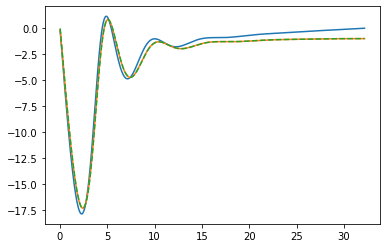

In [5]:
fig, ax = plt.subplots()

ax.plot(iet.k_array, h_dst3)
ax.plot(iet.k_array, h_dst4)
ax.plot(iet.k_array, h_dst4_attempt, '--')


# ax.plot(iet.k_array, βu_dct4) 
# ax.plot(iet.k_array, βu_dct4_attempt) 

# ax.plot(iet.k_array, βu_dct2) 
# ax.plot(iet.k_array, βu_dct2_attempt) 
# ax.set_yscale('symlog')
# ax.set_xscale('symlog')

### QTT Tests on Converged Sims

In [6]:
import tt as ttpy

from liquids.python.qtt_core.qtt_util import *

In [16]:
Γ, κ = 10, 3
N_bits = 10
iet = IET(1, [[Γ]], [[3/(4*π)]], [[1]], [1], kappa = κ, dst_type=2, N_bins = 2**N_bits, R_max = 100)
iet_PY = IET(1, [[Γ]], [[3/(4*π)]], [[1]], [1], kappa = κ, dst_type=2, N_bins = 2**N_bits, R_max = 100, closure='py')
iet.HNC_solve(tol=1e-6, num_iterations=1e5, iters_to_wait=1e4)
iet_PY.HNC_solve(verbose=True, tol=1e-6, num_iterations=1e5,  iters_to_wait=1e4)


0: Initial condition Total Error: 1.047e+00
Exiting status 0, reverting to best index so far: 251
Final iter:252, Total Error: 9.535e-07
0: Initial condition Total Error: 8.860e-01
1: Change in c_r: 8.860e-02, HNC Error: 1.695e-02, Total Error: 8.457e-01
2: Change in c_r: 8.457e-02, HNC Error: 1.629e-02, Total Error: 8.078e-01
3: Change in c_r: 8.078e-02, HNC Error: 1.699e-02, Total Error: 7.721e-01
4: Change in c_r: 7.721e-02, HNC Error: 1.834e-02, Total Error: 7.386e-01
5: Change in c_r: 7.386e-02, HNC Error: 2.002e-02, Total Error: 7.071e-01
6: Change in c_r: 7.071e-02, HNC Error: 2.185e-02, Total Error: 6.774e-01
7: Change in c_r: 6.774e-02, HNC Error: 2.371e-02, Total Error: 6.494e-01
8: Change in c_r: 6.494e-02, HNC Error: 2.526e-02, Total Error: 6.230e-01
9: Change in c_r: 6.230e-02, HNC Error: 2.661e-02, Total Error: 5.982e-01
10: Change in c_r: 5.982e-02, HNC Error: 2.788e-02, Total Error: 5.747e-01
11: Change in c_r: 5.747e-02, HNC Error: 2.906e-02, Total Error: 5.526e-01
12:

0

In [17]:
βu_r_array = iet.βu_k_matrix[0,0]
βu_r_bt = tensor_to_binarytensor(βu_r_array)
βu_r_qtt = ttpy.vector(βu_r_bt, eps=1e-4)

h_r_array = iet.h_k_matrix[0,0]
h_r_bt = tensor_to_binarytensor(h_r_array)
h_r_qtt = ttpy.vector(h_r_bt, eps=1e-4)

c_r_array = iet.c_k_matrix[0,0]
c_r_bt = tensor_to_binarytensor(c_r_array)
c_r_qtt = ttpy.vector(c_r_bt, eps=1e-4)

c_r_array = iet.γs_r_matrix[0,0]
c_r_bt = tensor_to_binarytensor(c_r_array)
c_r_qtt = ttpy.vector(c_r_bt, eps=1e-4)

In [18]:
2**N_bits

1024

In [19]:
get_tt_compression(βu_r_qtt)

5.626373626373627

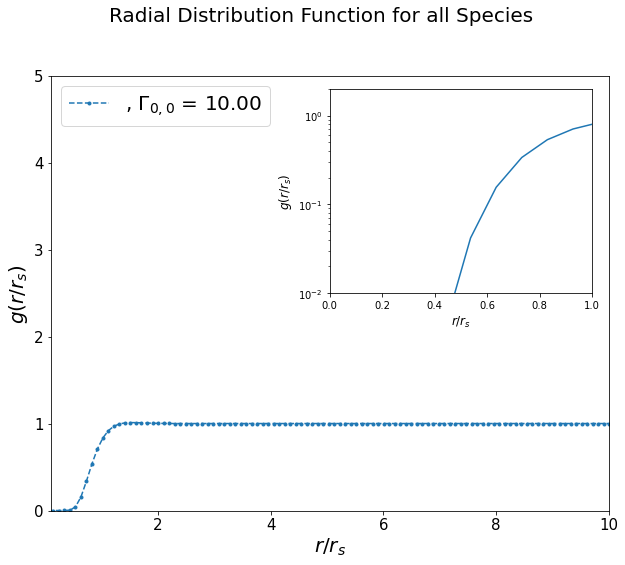

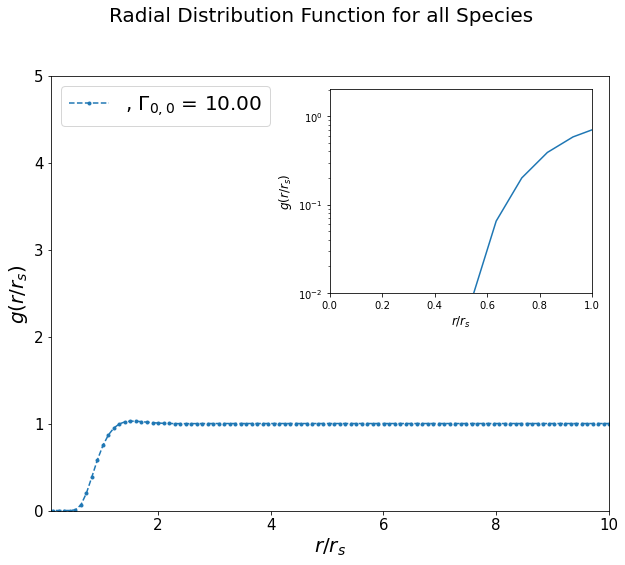

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:xlabel='$r/r_s$', ylabel='$g(r/r_s)$'>)

In [20]:
iet.plot_g_all_species()
iet_PY.plot_g_all_species()

In [21]:
get_bigtable(βu_r_array, βu_r_bt, np.nan, βu_r_qtt, [0,0,0,0])
get_bigtable(h_r_array, h_r_bt, np.nan, h_r_qtt, [0,0,0,0])
get_bigtable(c_r_array, c_r_bt, np.nan, c_r_qtt, [0,0,0,0])

╒═════════════════════════════╤═══════════════════════════════╤═════════════════════════╤═══════════════════════════════╕
│                             │                               │                         │                               │
├─────────────────────────────┼───────────────────────────────┼─────────────────────────┼───────────────────────────────┤
│                             │ Grid                          │ TT                      │ QTT                           │
├─────────────────────────────┼───────────────────────────────┼─────────────────────────┼───────────────────────────────┤
│ Error (|F1-F2|/|F1|)        │ 0                             │ nan                     │ 2.665e-05                     │
├─────────────────────────────┼───────────────────────────────┼─────────────────────────┼───────────────────────────────┤
│ Memory (of Square)          │ 0.0082 MB (0.0082 MB)         │ nan MB (nan MB)         │ 0.0015 MB (0.0179 MB)         │
├───────────────────────

[[''],
 ['', 'Grid', 'TT', 'QTT'],
 ['Error (|F1-F2|/|F1|)', 0, 'nan', '1.262e-05'],
 ['Memory (of Square)',
  '0.0082 MB (0.0082 MB)',
  'nan MB (nan MB)',
  '0.0005 MB (0.0027 MB)'],
 ['Compression (of Square)', 1, 'nan (nan)', '17.067 (3.084)'],
 ['Creation time (Square time)',
  '0.000e+00 [s] (3.099e-06 [s])',
  '0.000e+00 [s] (nan [s])',
  '0.000e+00 [s] (5.865e-05 [s])']]